In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [2]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [3]:
#Loading the dataset
data = pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Feature Engineering DATA CLEANING

Have a look at the information in data.

In [4]:
#Information on features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

we have 3 caterogical attributes. There are several miss values on Income attribute. 

In [5]:
#To remove the NA values
print("The total number of data-points before removing the rows with missing values are:", len(data))
df = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(df))

The total number of data-points before removing the rows with missing values are: 2240
The total number of data-points after removing the rows with missing values are: 2216


**Convert object to dateTime type on Dt_Customer**

In [6]:
df['Dt_Customer'].head()
#data[['Dt_Customer']].head()

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

it should be a datetime type as attribute

In [7]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [8]:
df['Dt_Customer'][0].date()

datetime.date(2012, 4, 9)

now i get the newest and oldest dates of this column

In [9]:
dates = []
for i in df['Dt_Customer']:
    i = i.date() #to use max and min
    dates.append(i)
    
newest = max(dates)
oldest = min(dates)

print(f"The newest customer's enrolment date in therecords: {newest}")
print(f"The oldest customer's enrolment date in the records: {oldest}")

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [10]:
daysRegistered = []
for i in dates:
    delta = newest - i #return value in days, LOL
    daysRegistered.append(delta)

df["Customer_For"] = daysRegistered
df["Customer_For"]

0      971 days
1      125 days
2      472 days
3       65 days
4      321 days
         ...   
2235   541 days
2236    61 days
2237   315 days
2238   316 days
2239   782 days
Name: Customer_For, Length: 2216, dtype: timedelta64[ns]

We should change timeDelta type to integer on this new attribute. 

We use for that the pandas function to_numeric with 

If the error argument is passed as **coerce**, then invalid parsing will be set as **NaN**.


In [11]:
df['Customer_For'] = pd.to_numeric(df['Customer_For'], errors='coerce')
df['Customer_For']

0       83894400000000000
1       10800000000000000
2       40780800000000000
3        5616000000000000
4       27734400000000000
              ...        
2235    46742400000000000
2236     5270400000000000
2237    27216000000000000
2238    27302400000000000
2239    67564800000000000
Name: Customer_For, Length: 2216, dtype: int64

## Now we will be exploring the unique values in the categorical features to get a clear idea of the data.
## 👀

In [12]:
mStatusValues = df['Marital_Status'].value_counts()
eValues = df['Education'].value_counts()

print(f'Total categories in the feature Marital_Status:\n {mStatusValues} \n')
print(f"Total categories in the feature Education:\n {eValues}")

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


## Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.

In [13]:
df['Age'] = 2023 - df['Year_Birth']
df['Age']

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Age, Length: 2216, dtype: int64

## Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.

In [14]:
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

## Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.

## PARTNER OR ALONE

In [15]:
print(f'Total categories in the feature Marital_Status:\n {mStatusValues} \n')

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 



In [16]:
df['Living_with'] = df['Marital_Status'].replace({  "Married":"Partner", 
                                                    'Together':'Partner',
                                                    'Single':'Alone',
                                                    'Divorced':'Alone',
                                                    'Widow':'Alone',
                                                    'Alone':'Alone',
                                                    'Absurd':'Alone',
                                                    'YOLO':'Alone'})

## Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
## To get further clarity of household, Creating feature indicating "Family_Size"

In [17]:
# n total of children
df['Children'] = df['Teenhome'] + df['Kidhome']

# Family size by single or partners plus n of children
df['Family_Size'] = df['Living_with'].replace({'Alone':1, 'Partner':2}) + df['Children']


## Create a feature "Is_Parent" to indicate parenthood status

In [18]:
#Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Children > 0, 1, 0)
df[['Is_Parent']]

,Is_Parent
0,0
1,1
2,0
3,1
4,1
...,...
2235,1
2236,1
2237,0
2238,1


## Creating three categories in the "Education" by simplifying its value counts.

In [19]:
print(f"Total categories in the feature Education:\n {eValues}")

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [20]:
df['Education'] = df['Education'].replace({'Graduation':'Graduate', 'PhD':'Postgraduate', 'Master':'Postgraduate', '2n Cycle':'Undergraduate', 'Basic':'Undergraduate'})
df[['Education']]

,Education
0,Graduate
1,Graduate
2,Graduate
3,Graduate
4,Postgraduate
...,...
2235,Graduate
2236,Postgraduate
2237,Graduate
2238,Postgraduate


## Dropping some of the redundant features

In [21]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

## Data Satus DATA ANALYSIS

In [22]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,54.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,27.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,46.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,53.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,64.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,130.000000,2525.000000,3.000000,5.000000,1.000000


These statistics provide a basic understanding of the distribution of income in the dataset. 
The average income is around $\$$52,247, but the standard deviation is relatively high, which means that there is a large spread of income values around the mean. The minimum income value is $\$$1730, while the maximum is $\$$666,666, indicating that the dataset has a wide range of income values.

Quartiles are useful for understanding the spread of a dataset and identifying any potential outliers. If a number falls far below the first quartile or far above the third quartile, it could be an outlier and may need to be investigated further.

Suppose you are analyzing the salaries of employees in a company. You have a dataset with the salaries of all employees, and you want to understand the distribution of salaries and identify any potential outliers.

You can use quartiles to divide the salaries into four equal parts and calculate the first quartile (Q1), median (Q2), and third quartile (Q3) of the dataset. For example, if you have a dataset of 100 salaries, you can calculate the quartiles as follows:

* Q1: The 25th percentile, i.e., the salary below which 25% of the salaries fall
* Q2: The 50th percentile, i.e., the median salary
* Q3: The 75th percentile, i.e., the salary below which 75% of the salaries fall


By calculating the quartiles, you can understand the spread of salaries and identify any potential outliers. For example, if the third quartile (Q3) is much higher than the median (Q2), it could indicate that there are a few employees with very high salaries, which could be investigated further to understand why. Similarly, if the first quartile (Q1) is much lower than the median (Q2), it could indicate that there are employees with very low salaries, which could be investigated to ensure fairness in the compensation structure.

In summary, quartiles can be useful in summary statistics analysis to understand the distribution of a dataset and identify any potential outliers or anomalies.

**Wines**
* 25th percentile: 24, which means that **25% of the observations have values equal to or less than 24**.
* 50th percentile or median: 174.5, which means that 50% of the observations have values equal to or less than 174.5. In other words, this is the middle value of the dataset.
* 75th percentile: 505, which means that 75% of the observations have values equal to or less than 505.

Overall, this summary statistics suggests that the mean amount spent on wines in the last 2 years is $\$$305.09, **but there is a wide variation**
in spending between customers, with a standard deviation of $\$$337.33. 

Half of the customers spent less than $\$$174.50 on wines in the last 2 years, while the other half spent more. The majority of customers (75%) spent less than $\$$505 on wines in the last 2 years. However, **there are some customers who spent up to $\$$1493 on wines in the last 2 years, which could be considered as outliers.**

**Fruits**


Overall, this summary statistics suggests that the mean amount spent on fruits in the last 2 years is $\$$26.36, but there is a relatively large variation in spending between customers, with a standard deviation of $\$$39.79. The majority of customers (50%) spent less than $\$$8 on fruits in the last 2 years, while 25% of the customers spent less than $\$$2. However, there are also customers who spent up to $\$$199 on fruits in the last 2 years, which could be considered as outliers.

However, it's important to keep in mind that these summary statistics alone do not provide a complete picture of the data. It's important to visualize the data using appropriate plots to get a better understanding of its distribution, identify potential outliers or missing values, and perform further statistical analysis to draw meaningful insights.
**it is always important to visually inspect and understand the distribution of the data before drawing any conclusions.**

**Gold**

* The dataset contains 2216 observations.
* The mean amount spent on gold in the last 2 years is $\$$43.97.
* The standard deviation of the amount spent on gold is $\$$51.82, **indicating that the data is moderately spread out around the mean.**
* The minimum amount spent on gold is $\$$0, indicating that some people in the dataset did not spend any money on gold in the last 2 years.
* The 25th percentile of the amount spent on gold is $\$$9, which means that 25% of the people in the dataset spent less than $\$$9 on gold in the last 2 years.
* The median (50th percentile) of the amount spent on gold is $\$$24.5, which means that 50% of the people in the dataset spent less than $\$$24.5 on gold in the last 2 years.
* The 75th percentile of the amount spent on gold is $\$$56, which means that 75% of the people in the dataset spent less than $\$$56 on gold in the last 2 years.
* The maximum amount spent on gold is $\$$321, indicating that some people in the dataset spent a significant amount of money on gold in the last 2 years.


Overall, these summary statistics provide a general overview of the amount spent on gold in the dataset, including the average amount, the spread of the data, and the distribution of spending among different groups of people.

**Standard deviation and key factor to interpret it**


Yes, the range of values in the dataset can be an important factor in determining whether a standard deviation is large or small. A larger range of values typically indicates more variability in the data, which can result in a larger standard deviation. On the other hand, a smaller range of values indicates less variability and a smaller standard deviation.

However, it's important to note that the size of the standard deviation also depends on the specific shape and distribution of the data. For example, a dataset with a normal distribution and a large range of values may have a smaller standard deviation than a dataset with a skewed distribution and a smaller range of values.

*The size of the standard deviation **is not necessarily related to how far it is from the mean**. A standard deviation can be considered large or small depending on the context and the range of values in the dataset.*


### Plottingsome of the selected features

pairplot by Is_Parent

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

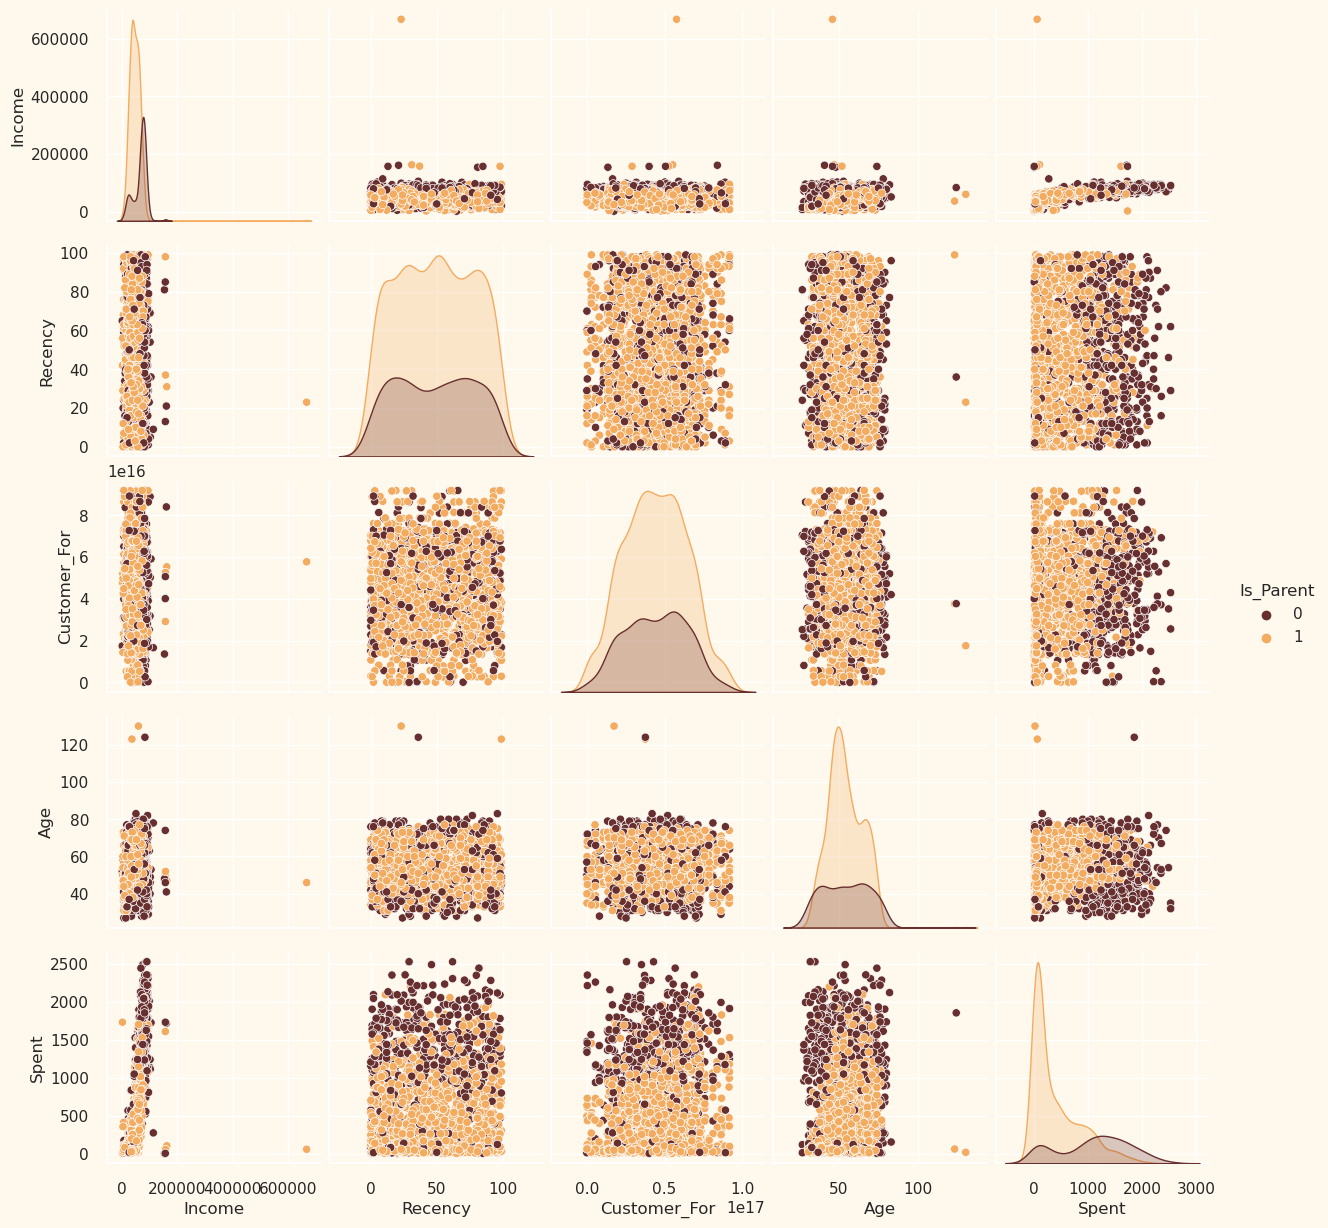

In [23]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()

sns.pairplot(df[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

Trazar relaciones por pares en un conjunto de datos.

In [24]:
class FileWriterUtil:
    def __init__(self, file):
        self.file = file
        self.content = ""

    def write(self, str):
        self.content += str

    def save(self):
        return Memento(self.file, self.content)

    def undo(self, memento):
        self.file = memento.file
        self.content = memento.content
        

class Memento:
    def __init__(self, file, content):
        self.file = file
        self.content = content


class FileWriterCaretaker:
    def save(self, writer):
        self.obj = writer.save()

    def undo(self, writer):
        writer.undo(self.obj)


In [25]:
if __name__ == '__main__':
    caretaker = FileWriterCaretaker()

    writer = FileWriterUtil("data.txt")
    writer.write("First Set of Data\n")
    print(writer.content + "\n\n")

    # lets save the file
    caretaker.save(writer)
    # now write something else
    writer.write("Second Set of Data\n")

    # checking file contents
    print(writer.content + "\n\n")

    # lets undo to last save
    caretaker.undo(writer)

    # checking file content again
    print(writer.content + "\n\n")

First Set of Data



First Set of Data
Second Set of Data



First Set of Data



